# Retrival-Augmented Generation

## Components of RAG

- **Retrieval Engine** - Search and rank data based on a query. 
    - **Input Query Processor** - Interpret and refine user input.

    - **Search Engine** - Searches indexed data using a model (i.e. SEntence Transformers) then ranks the embeddings using another model (i.e. Elastisearch KNN)

- **Augmentation Engine** - Takes the top-ranked data from retrieval engine and adds to **prompt**, that will be def to the LLM.

- **Generation Engine** - AAdvanced LLM. Creates a response by combining its language skills with the newly retrieved external data that is used as a prompt addition to the LLM.
     - Allows generation of response that is coherent, up-to-date, and relevant.

## [Step-by-Step of a RAG](https://www.linkedin.com/pulse/how-rag-works-detailed-explanation-its-components-steps-pradeep-menon-ws7sc/)

### **Data-indexing** 


- The data that needs to be ingested, be it documents, images etc. is processed and chunked. Then the data is indexed using an indexing strategy.
- The step of data indexing is performed periodically as and when new data needs to be used for response generation.

- ***Search Indexing*** - Used when the data is indexed by exact matches of words or phrases. 
    - Fast and precise, but can miss relevant data when not matched exactly.

- ***Vector Indexing*** - Used when data is indexed by numerical vectors representing meaning of words or phrases.
    - Slower and less precise, but can find more relevant data that is not an exact match.

- ***Hybrid indexing*** - Indexed by both eaxt matches and numerical vectors. Hybrid indexing can improve the accuracy and diversity of data retrieval.

### **Input Query Processing**

- Fine-tuning the question to improve its compatibility with the indexed data. The question is simplified and optimized for effective search.

- *Search indexing*: Undegoes simple text processing to remove stopwords, or simply use the question as it is.

- *Vector indexing*: IQP is more complex and complicated:
    - The input query is transformed into a **vector** using neural network techniques like encoding.

    - This transformation captures its **semantic similarity** (i.e. SBERT). 

- **Hybrid indexing** - Here, the input query processing can be a combination of search and vector indexing.
    - The query processing can involve using the question as is or removing some stop words to make it more concise

    - Then, a neural network can be used to encode the query into a vector that captures its semantic similarity.

### **Search and Ranking**

- The query, which can be a word, a phrase, or a vector, is used to search the indexed data, which can be exact matches or numerical vectors 
- The search returns a list of data that are relevant to the query.
- The search result is further used by RAG to generate response that is responsive and useful for the users
- RAG can use different algorithms for text search depending on the type of indexing and the type of query.

- *Search Indexing*
    - **TF-IDF** (Term Frequency-Inverse Document Frequency): Ranks the documents based on how often the quer term appears.
    - **BM25** - Ab etter version of TF-IDF. COnsiders how often a term appears and how long a document is, giving a more advanced ordering of search results.

- *Vector Indexing*
    - **Word Embeddings** (Word2Vec, GloVe) - Converts words into dense vectors that capture meanings, used for understanding word context and relationships.
    - **Cosine Similarity** - Measures the cosine of the angle between two vectors, used to determine query vector similarity to document vectors.
    - **SBERT** - Integrates Cosine Similarity to standard BERT model.

- *Hybrid Indexing* utilizes both algorithmically. 

### **Prompt Augmentation**

- We add the best pieces of information to the original question to enhance the prompt.
- This step ensures that the LLM's response is not solely reliant on its pre-existing knowledge. The response is also tailored with up-to-date and specific information.

In [ ]:
prompt_template = """
Generate me 5 questions for ESAT (Knowledge).

Additional information:
<information>
"""

### **Response Generation**

- LLM uses the augmented prompt to create a response. 
- The answer is ***grounded*** on the specific, current data obtained earlier.
- The LLM combines its own knowledge with external data to create precise and relevant responses.

## [RAG Architectures](https://humanloop.com/blog/rag-architectures)

### **Simple RAG**

- **Query Input**: The user provides a prompt or question.
- **Document Retrieval**: The model searches a fixed database to find relevant information.
- **Generation**: Based on the retrieved documents, the model generates a response that is grounded in the real-world data it found.

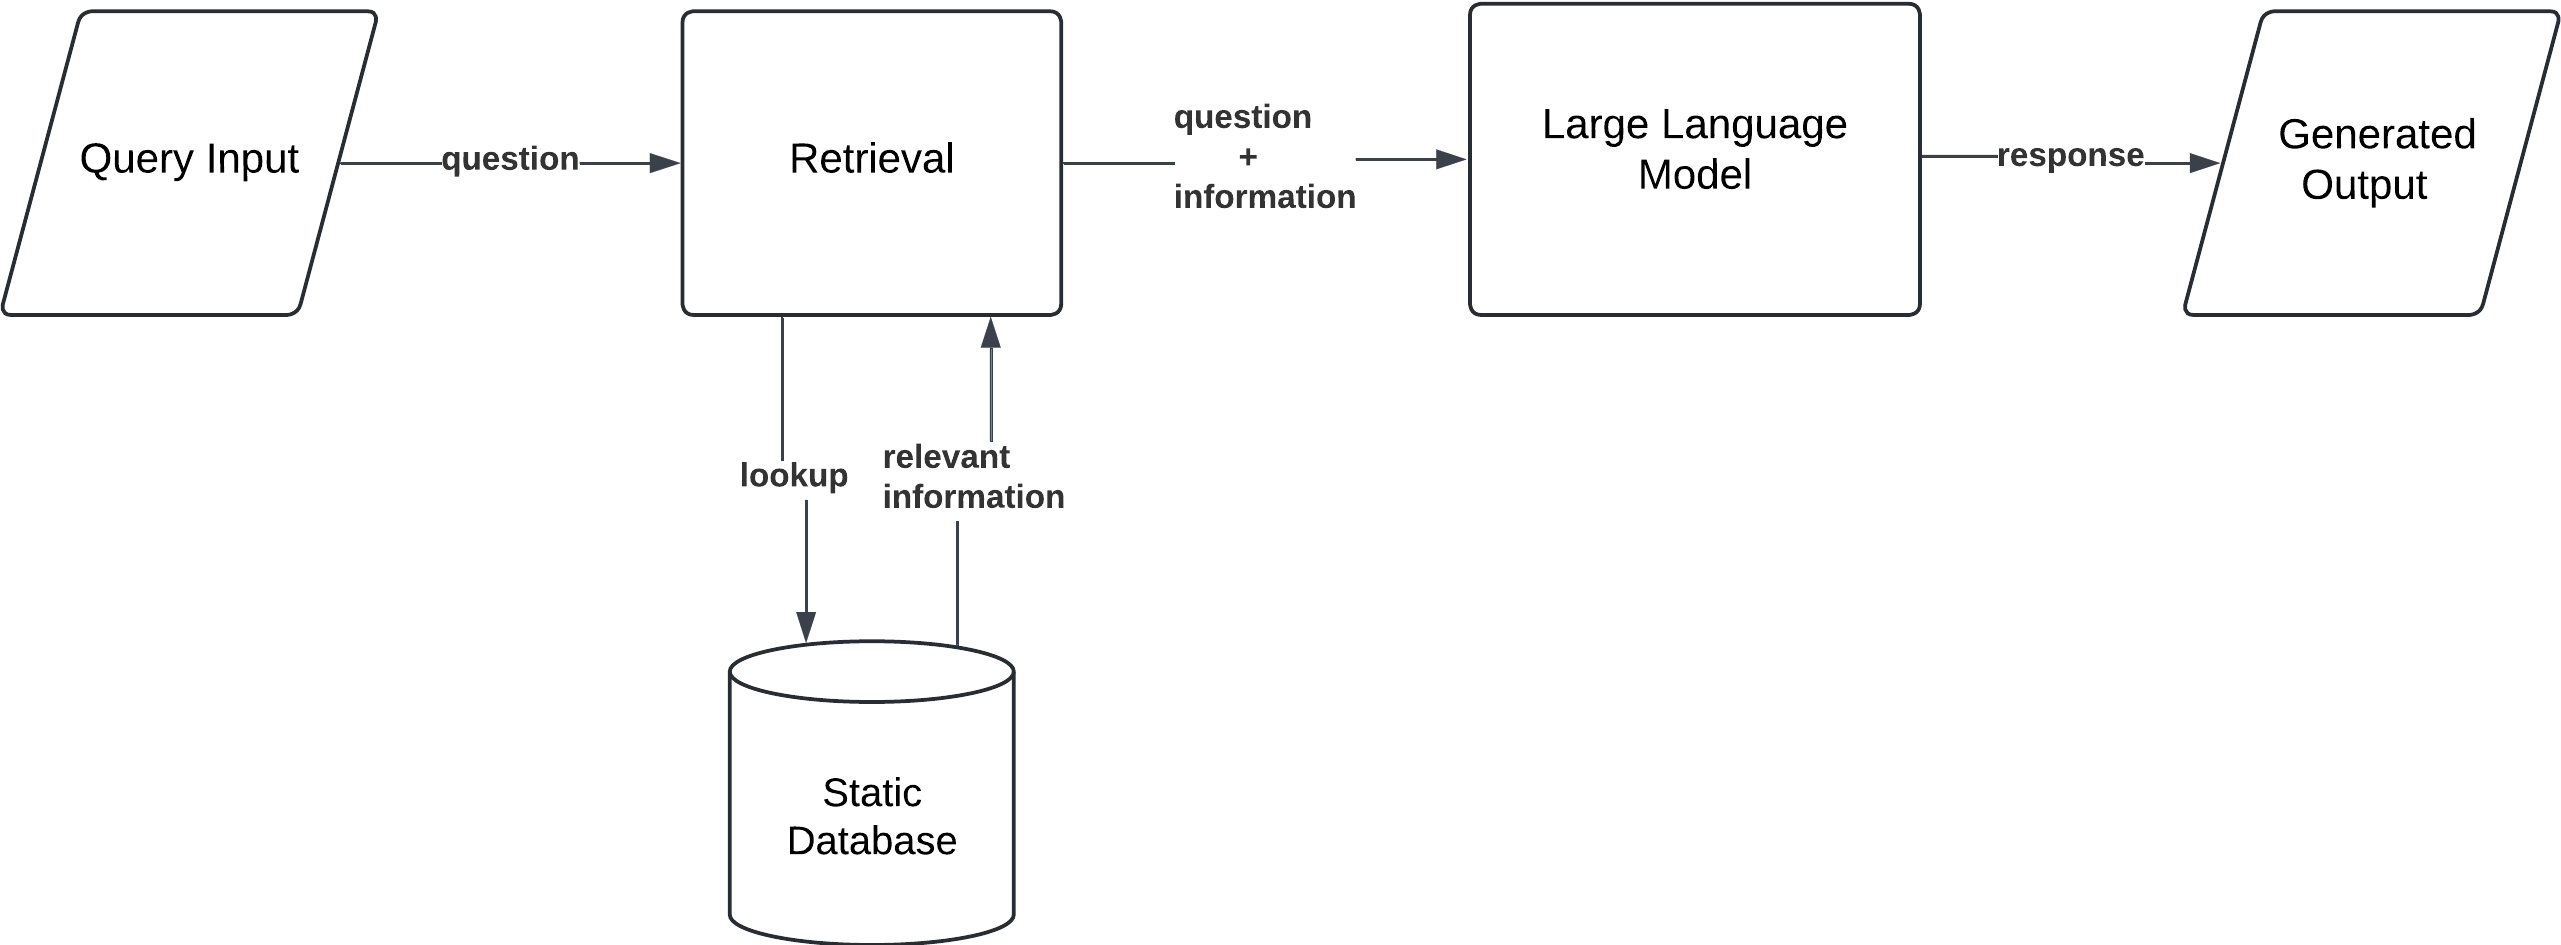

### **Simple RAG With Memory**

- Query Input
- **Memory Access**: The model retrieves past interactions or data stored in its memory.
- **Document Retrieval**: It searches the external database for new relevant information.
- **Generation**: The model generates a response by combining retrieved documents with the stored memory.

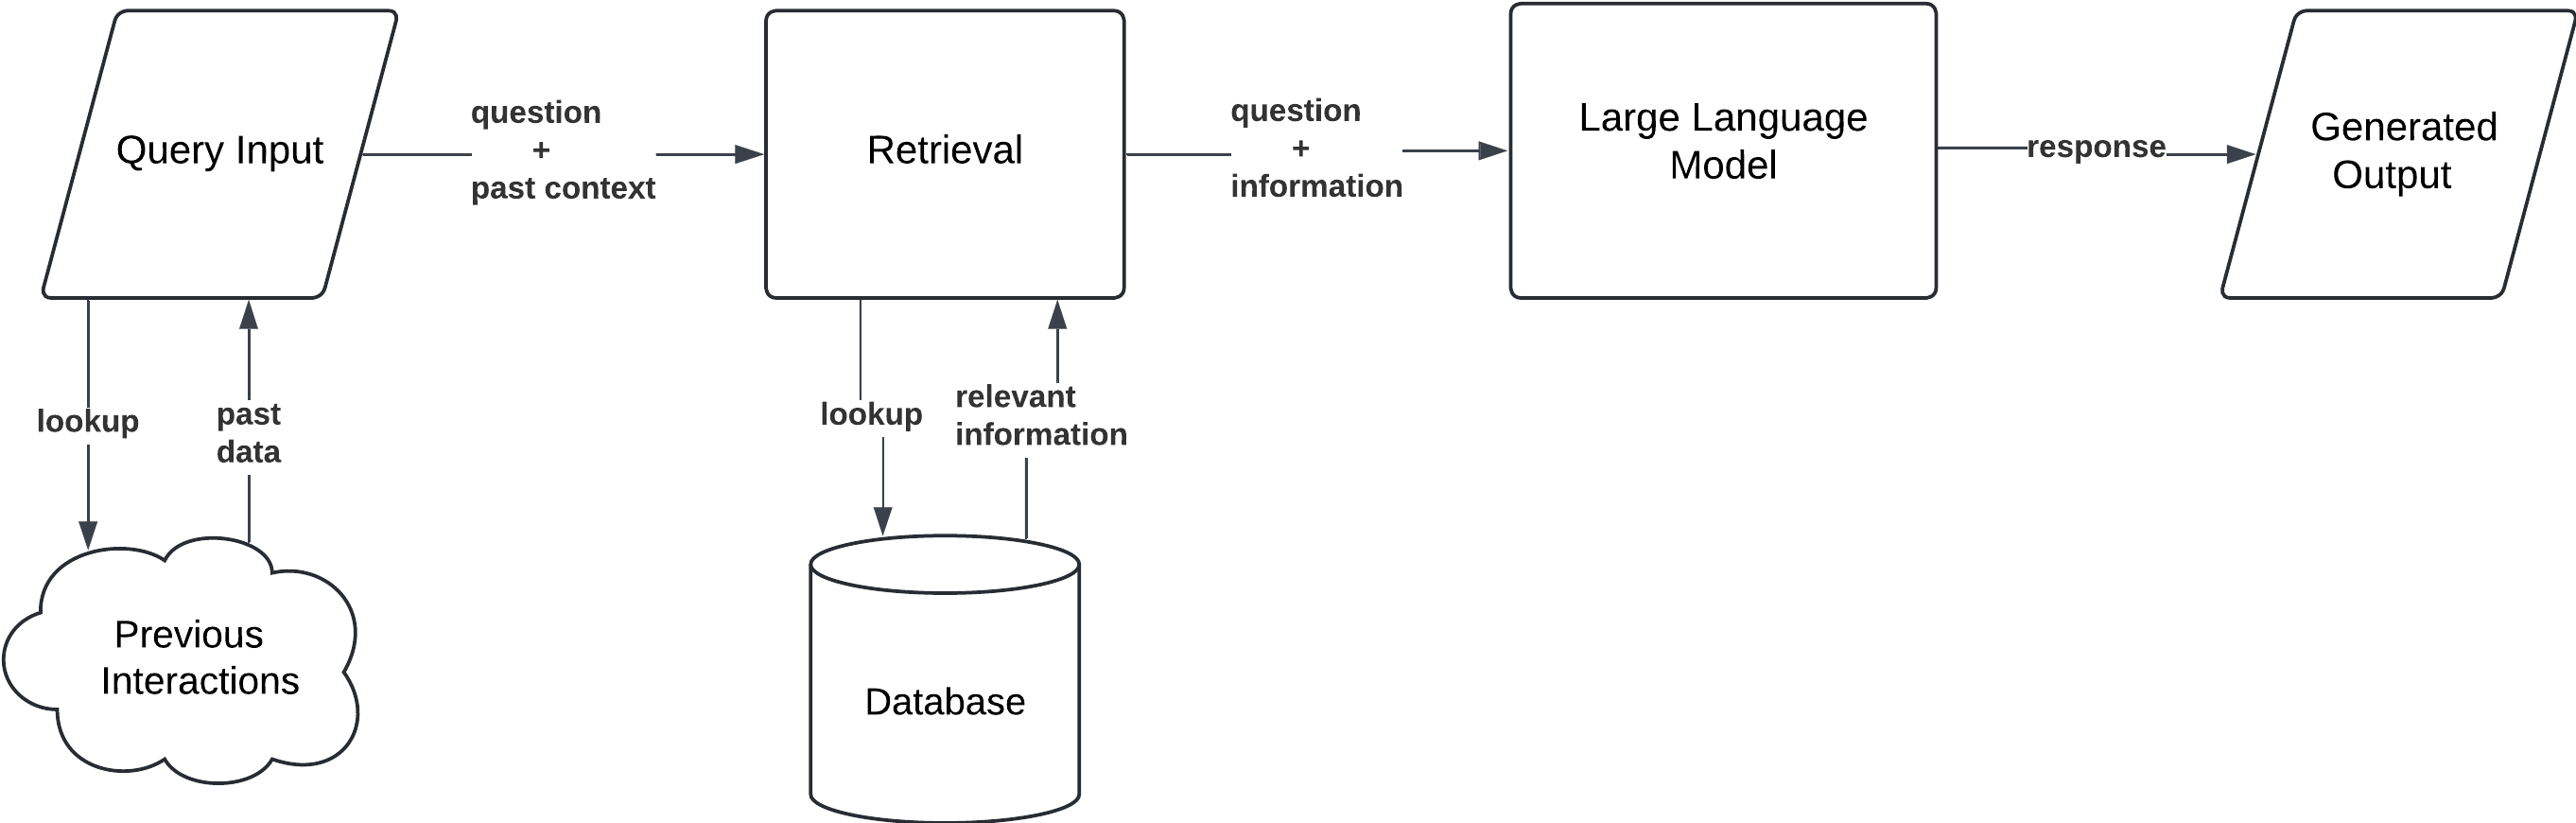

### **Branched RAG**

Branched RAG enables a more flexible and efficient approach to data retrieval by determining which specific data sources should be queried based on the input.

- Query Input
- **Branch Selection**: The model evaluates multiple retrieval sources and selects the most relevant based on the query.
- **Single Retrieval**: The model retrieves documents from the selected source.
- **Generation**: The model generates a response based on the retrieved information from the chosen source.

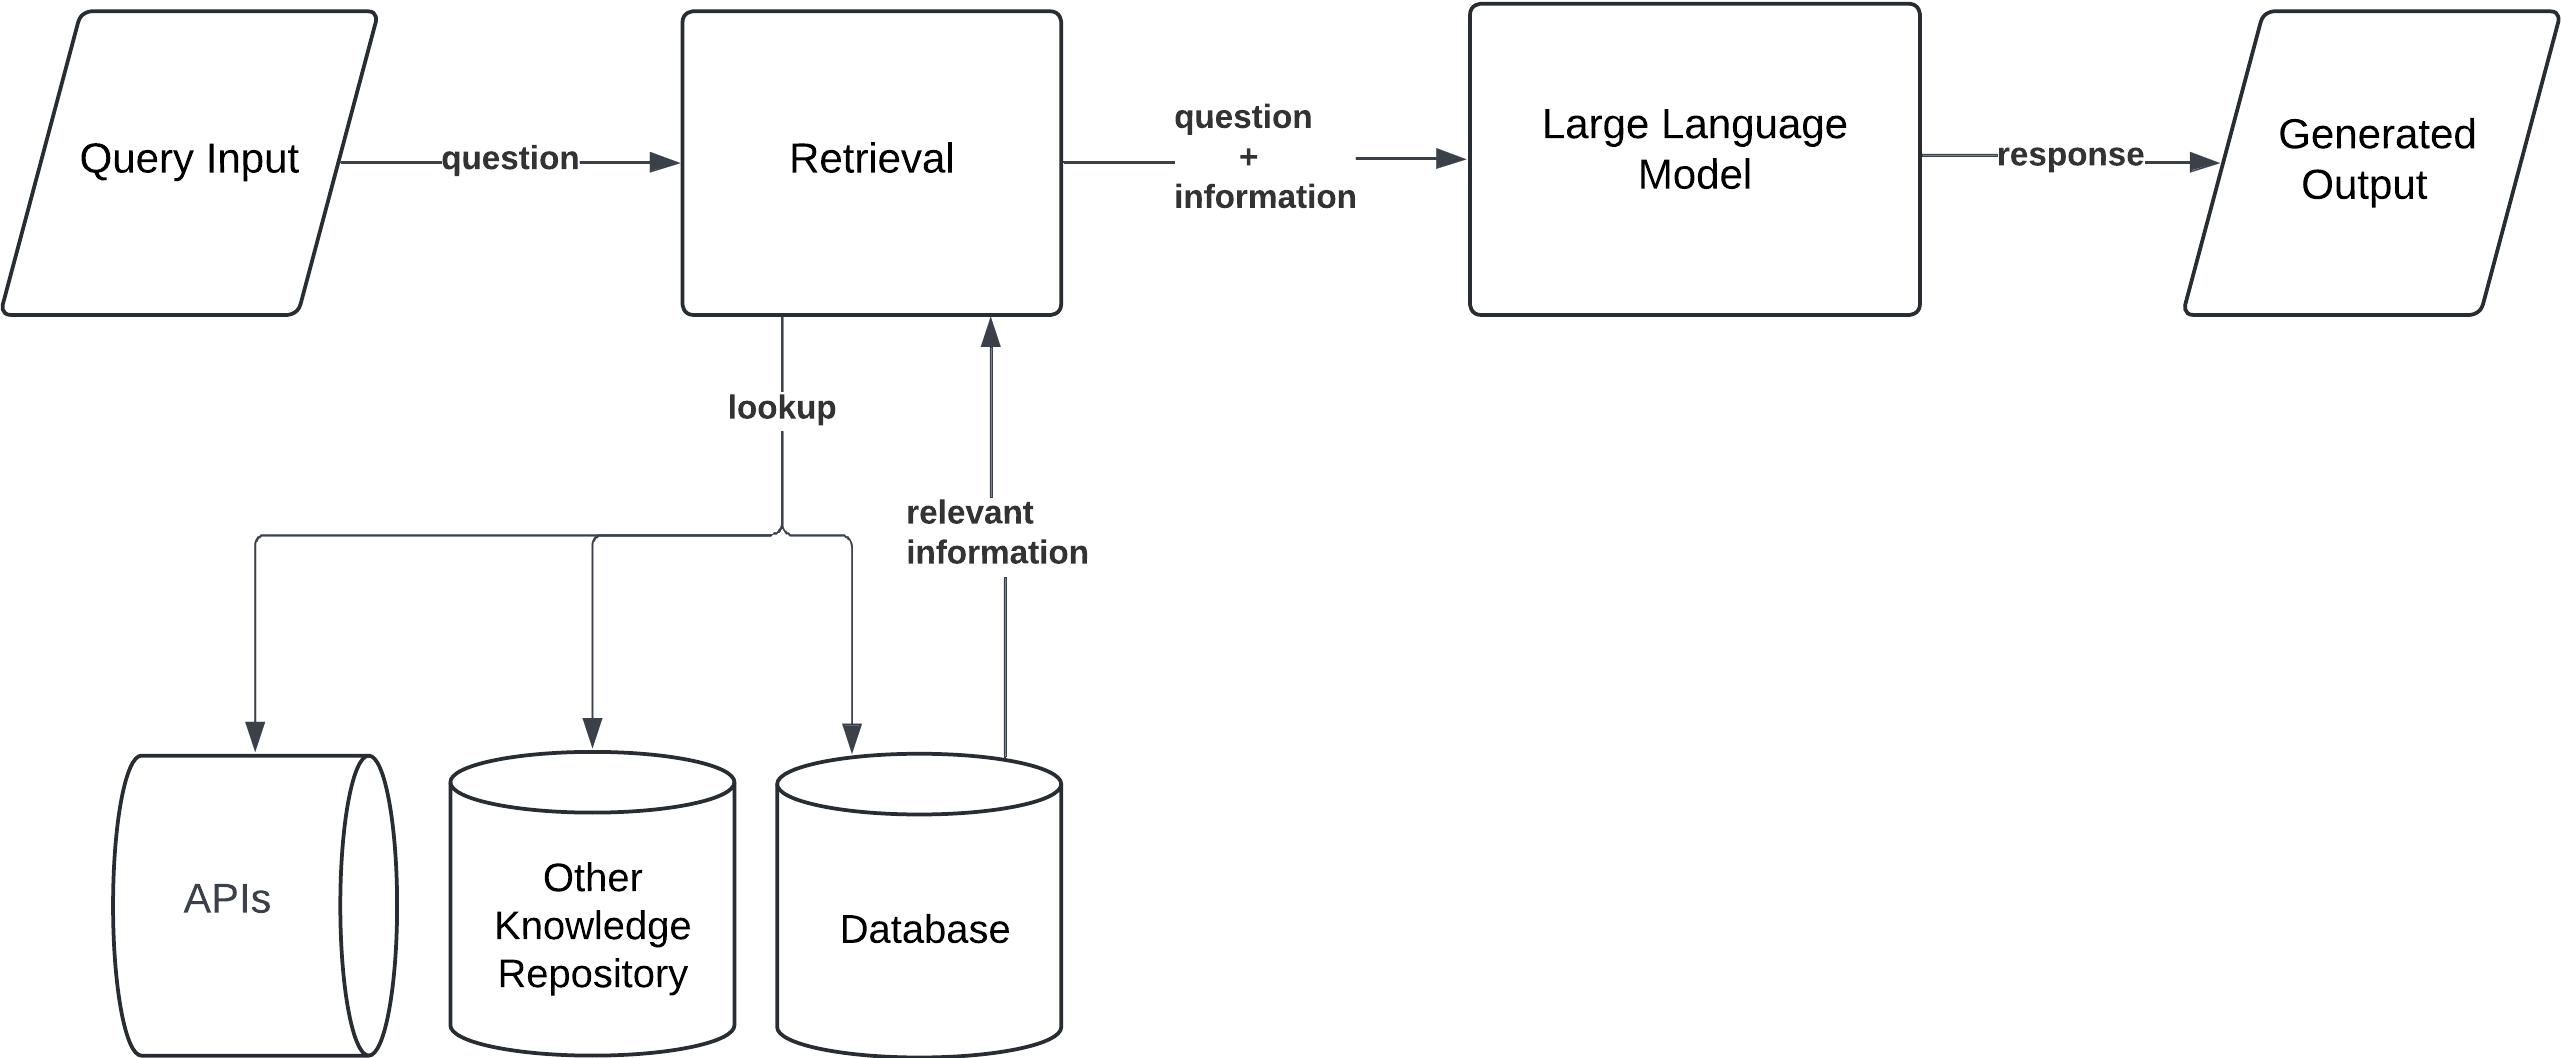

### **HyDe** (Hypothetical Document Embedding)

- Query Input

- **Hypothetical Document Creation**: The model generates an embedded representation of an ideal response.
- *Document Retrieval*: Using the hypothetical document, the model retrieves actual documents from a knowledge base.
- *Generation*: The model generates an output based on the retrieved documents, influenced by the hypothetical document.

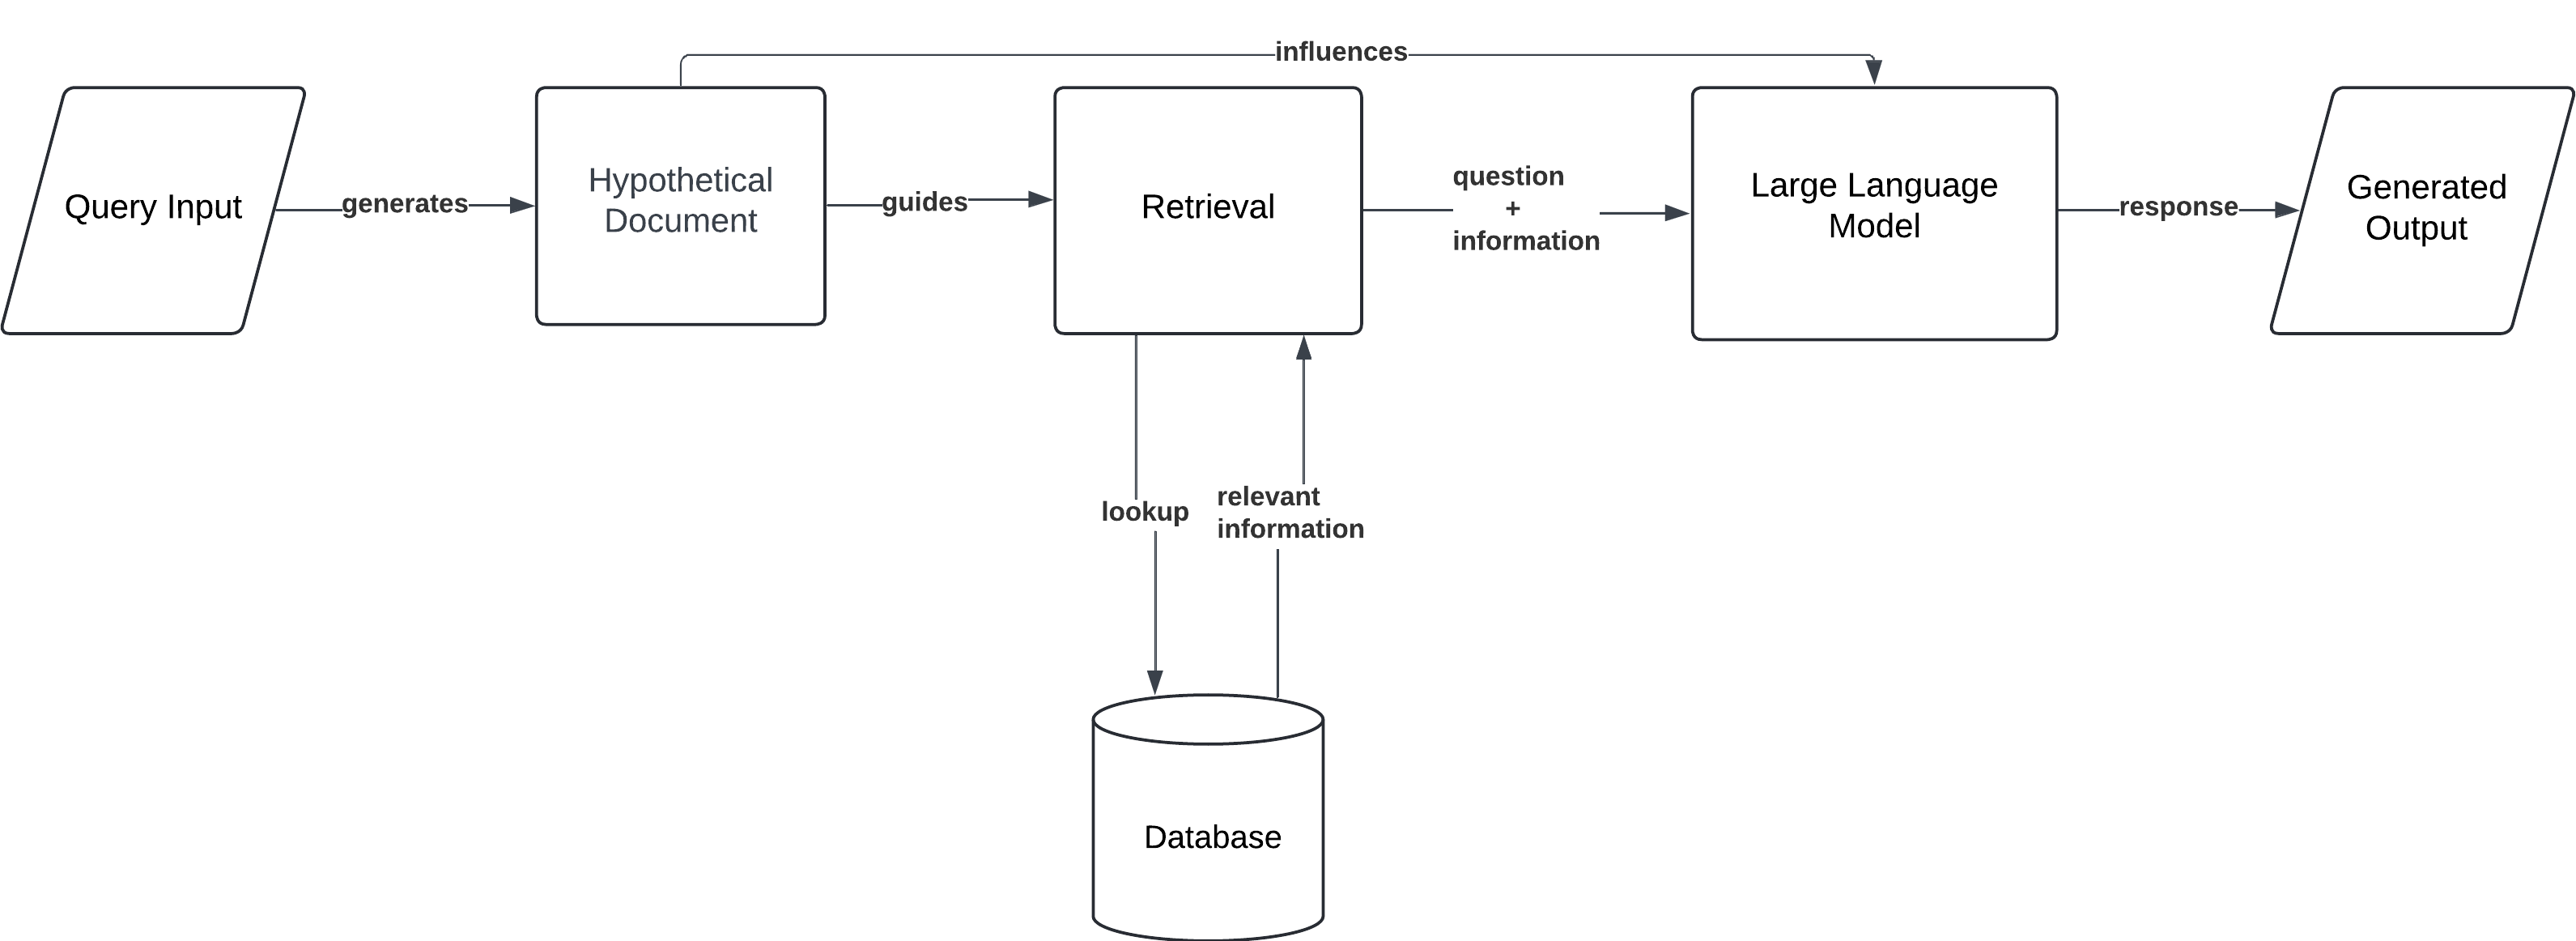

### **Adaptive RAG** 

- Query Input: The user submits a prompt.
- **Adaptive Retrieval**: Based on the query's complexity, the model decides whether to retrieve documents from one or multiple sources, or to adjust the retrieval method.
- **Generation**: The model processes the retrieved information and generates a tailored response, optimising the retrieval process for each specific query.

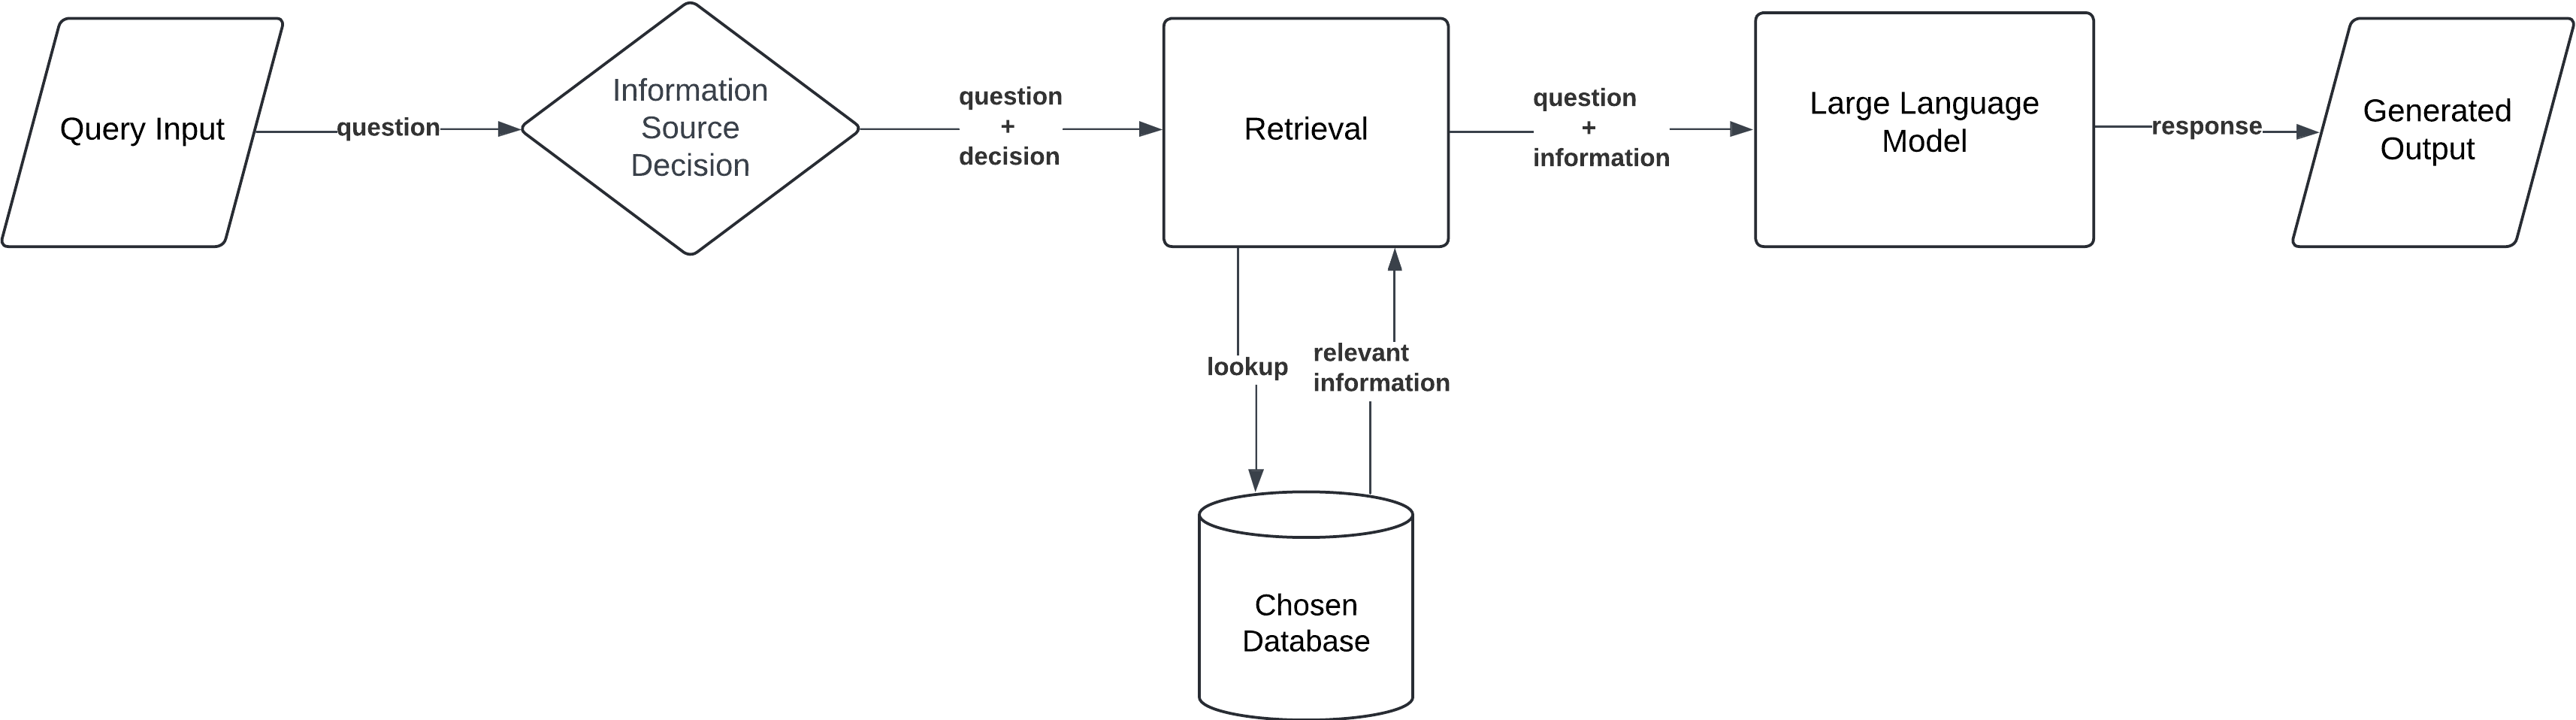

### **Corrective RAG**

- Incorporates a self-reflection or self-grading mechanism to the retrieved documents.
- Possibly too complex

- Query Input: The user submits a query or prompt.

- Document Retrieval: The model retrieves documents from the knowledge base and evaluates their relevance.
- **Knowledge Stripping and Grading**: The retrieved documents are broken down into "knowledge strips" — smaller sections of information. Each strip is graded based on relevance.
- **Knowledge Refinement**: Irrelevant strips are filtered out. If no strip meets the relevance threshold, the model seeks additional information, often using web searches to supplement retrieval.
- **Generation**: Once a satisfactory set of knowledge strips is obtained, the model generates a final response based on the most relevant and accurate information.

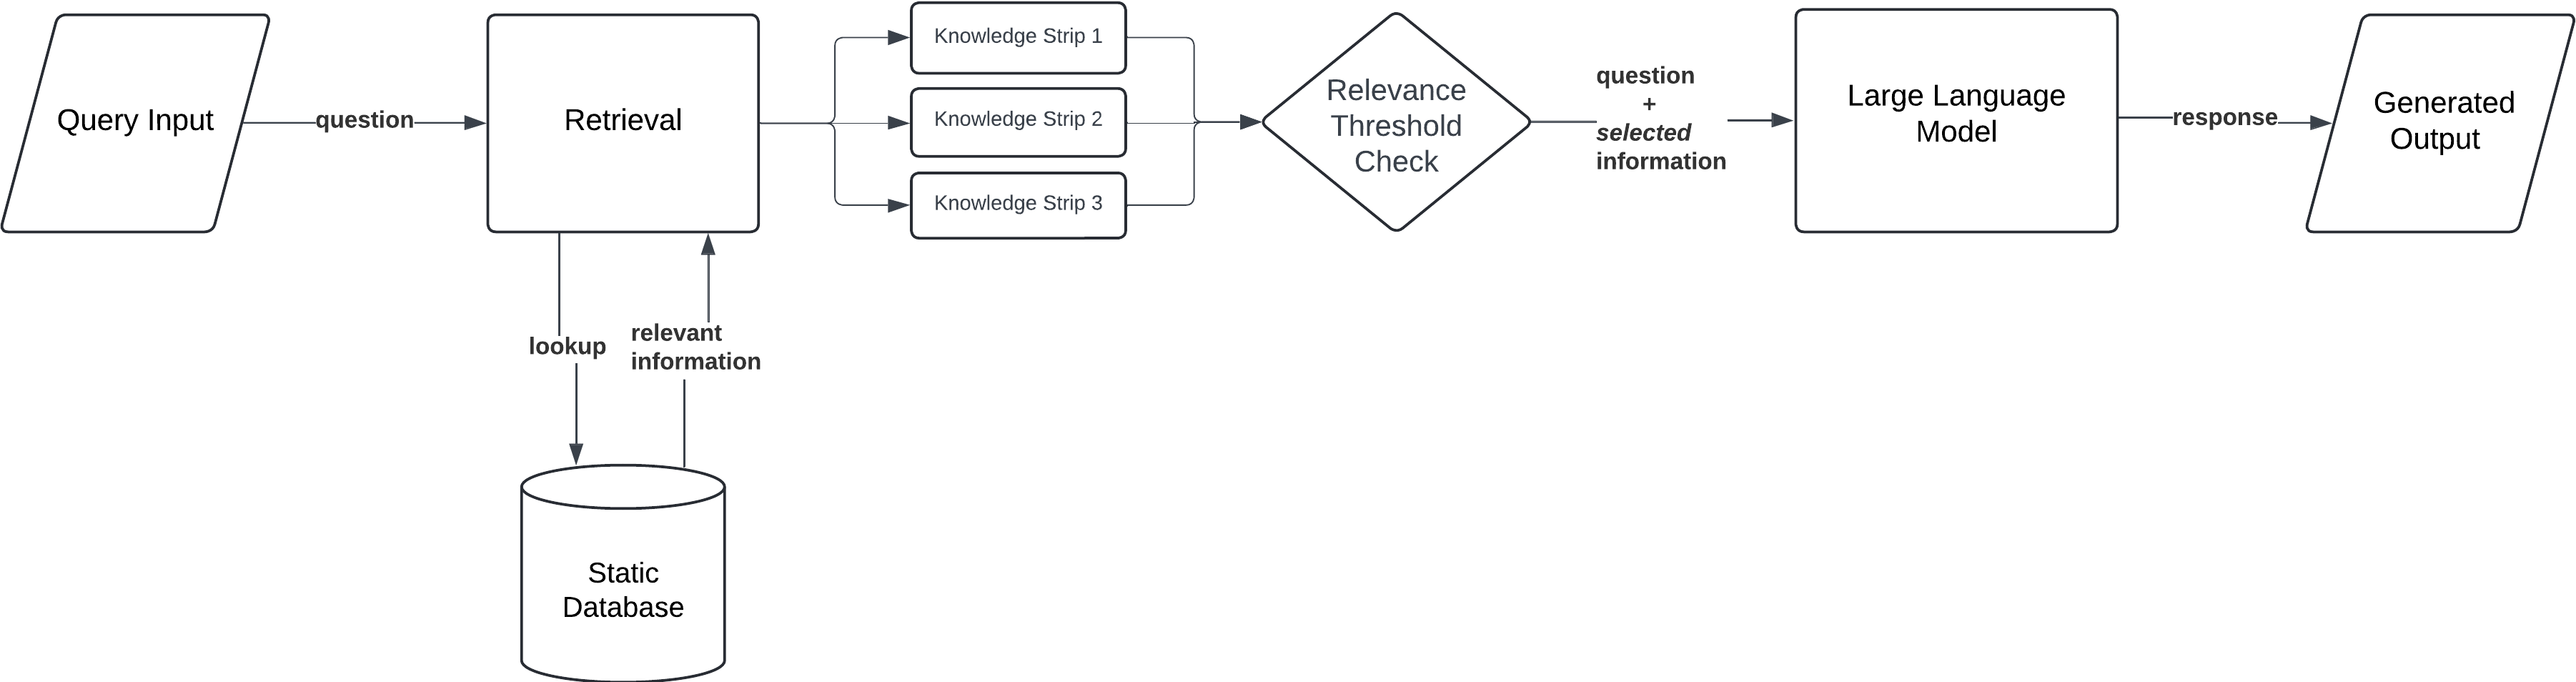

### **Self-RAG**

- Self-RAG introduces a self-retrieval mechanism, allowing the model to autonomously generate retrieval queries during the generation process.
- Self-RAG can iteratively refine its retrieval queries as it generates content. 
- This self-guided approach enhances the quality and relevance of information, especially for complex or evolving queries.

- Query Input: The user submits a prompt.

- Initial Retrieval: The model retrieves documents based on the user’s query.
- **Self-Retrieval Loop**: During the generation process, the model identifies gaps in the information and issues new retrieval queries to find additional data.
- Generation: The model generates a final response, iteratively improving it by retrieving further documents as needed.

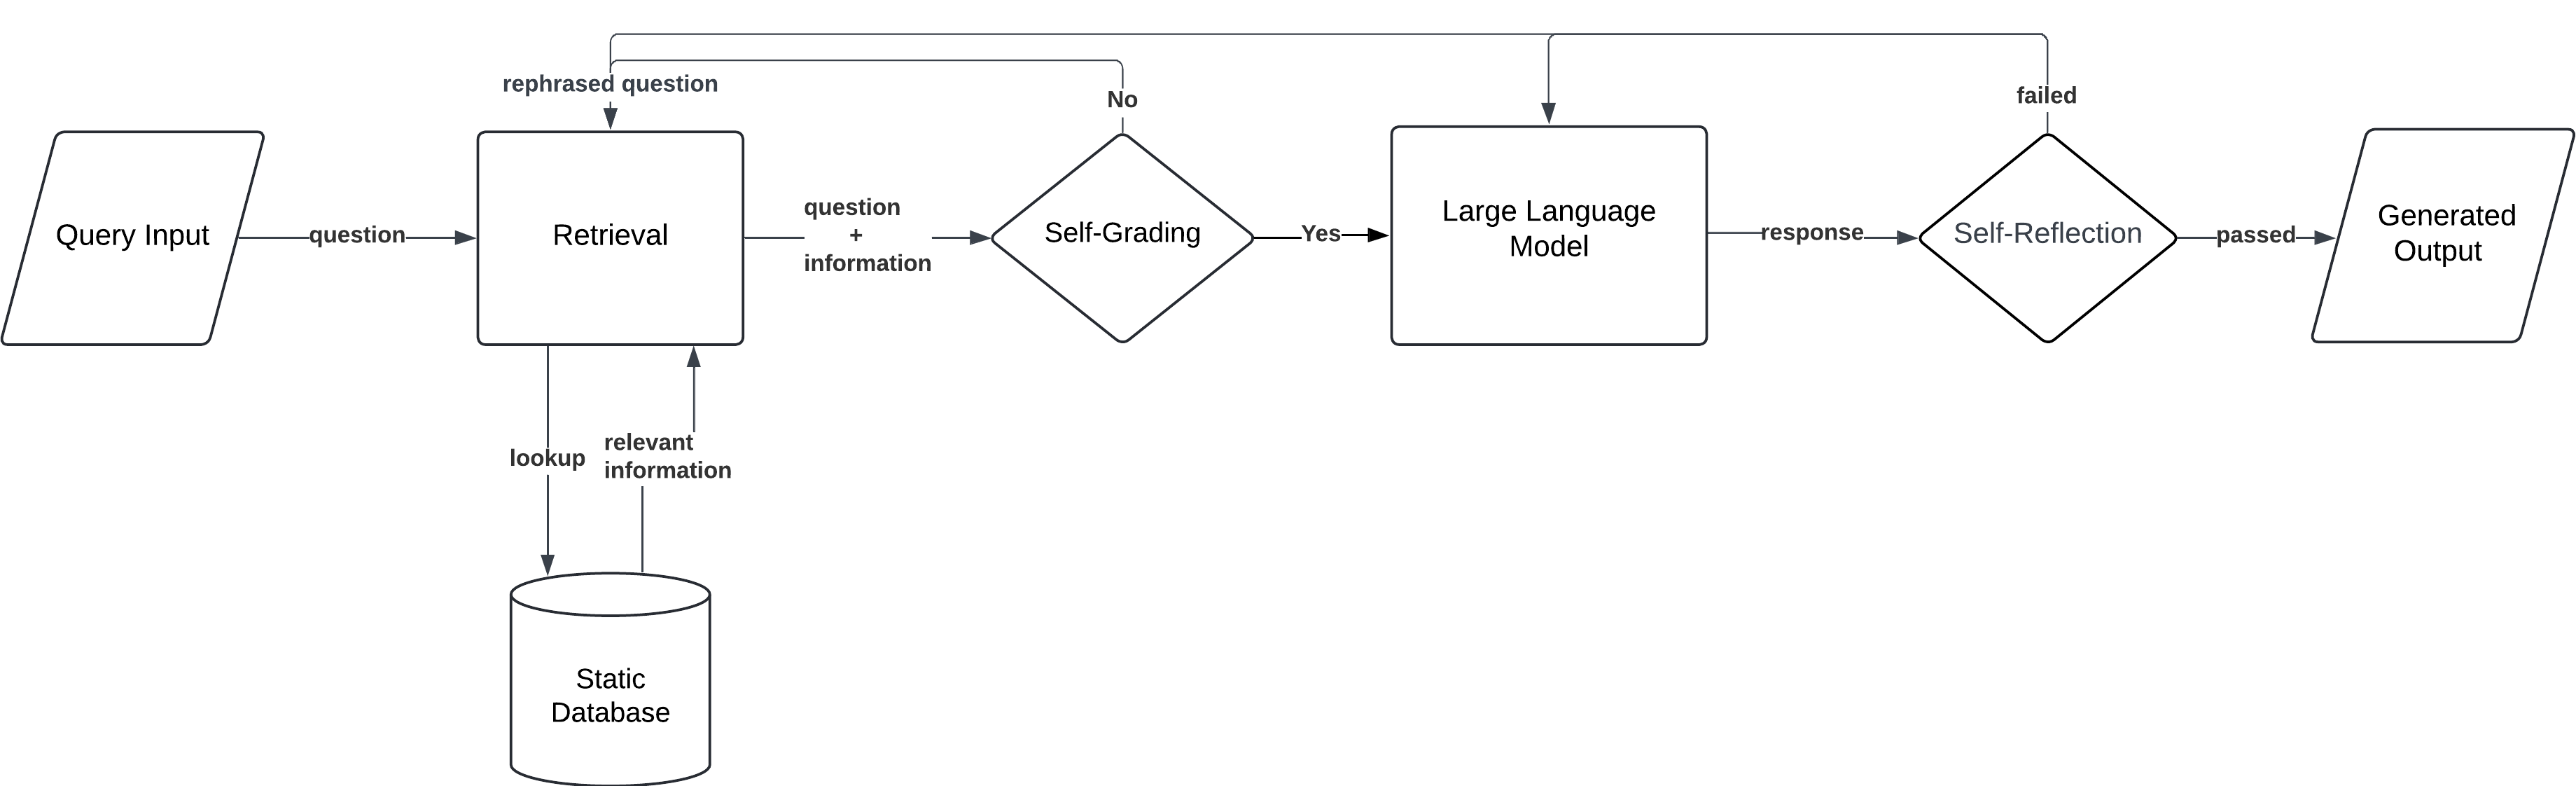

### **Agentic RAG**

- Introduces a more autonomous, agent-like behaviour in the retrieval and generation process.

- In this implementation, the model acts as an "agent" that can perform complex, multi-step tasks, proactively interacting with multiple data sources or APIs to gather information.
- What sets Agentic RAG apart is its ability to assign Document Agents to each individual document and orchestrate their interactions through a meta-agent.
- This system allows for more sophisticated decision-making, enabling the model to determine which retrieval strategies or external systems to engage with based on the complexity of the query.

- Query Input: The user submits a complex query or task.

- **Agent Activation**: The model activates multiple agents. Each Document Agent is responsible for a specific document, capable of answering questions and summarising information from that document.
- **Multi-step Retrieval**: The Meta-Agent manages and coordinates the interactions between the various Document Agents, ensuring the most relevant information is retrieved.
- **Synthesis and Generation**: The Meta-Agent integrates the outputs from the individual Document Agents and generates a comprehensive, coherent response based on the collective insights gathered.

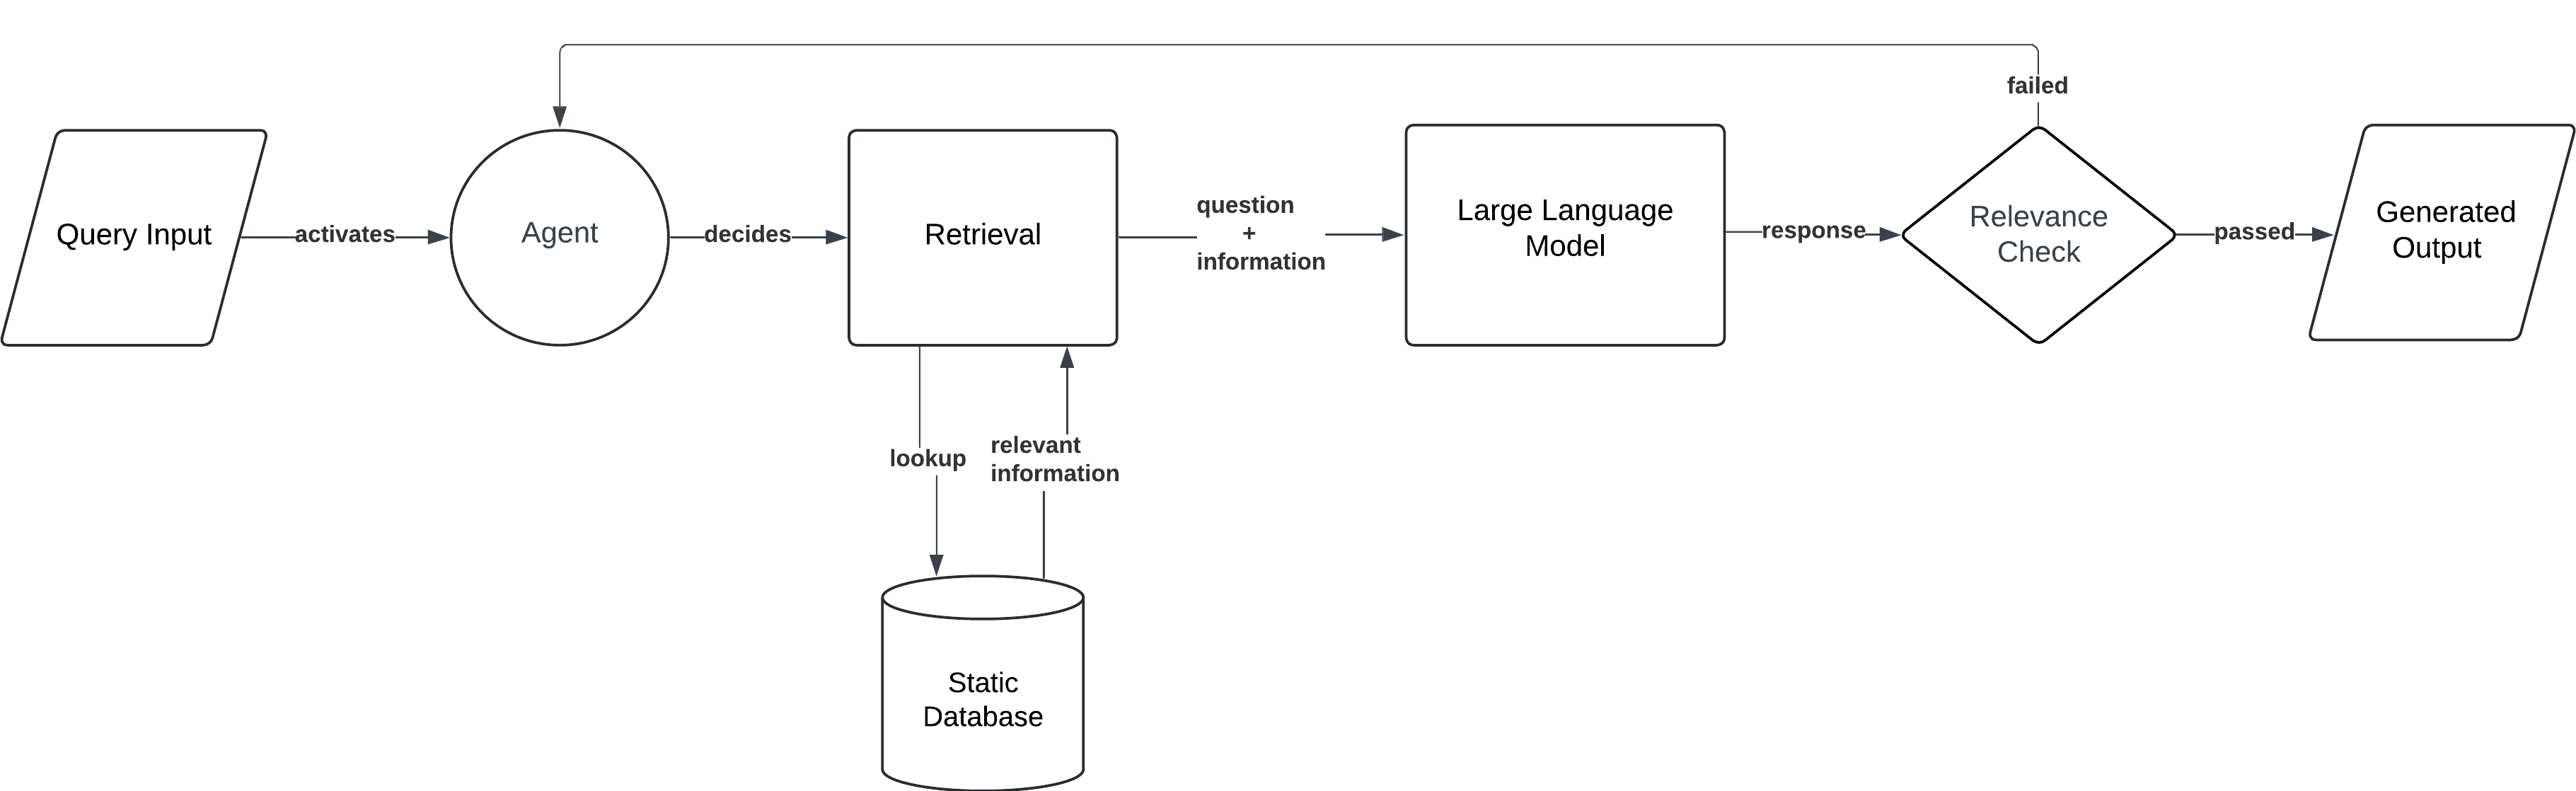